In [34]:
import pandas as pd # Manipulación de datos
import numpy as np # Cálculos numéricos 
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos avanzados

In [35]:
# Cargar datos desde archivos Excel o mis datos
df_2021 = pd.read_excel('2023-2024.xlsx')   # Datos de 2020-2021
df_2024 = pd.read_excel('2024-2025.xlsx') #     Datos de 2023-2024

In [36]:
# Hacer mayúsculas los nombres de carreras
df_2021['Carrera'] = df_2021['Carrera'].str.upper().str.strip() # Normalizar nombres
df_2024['Carrera'] = df_2024['Carrera'].str.upper().str.strip() # Normalizar nombres


In [37]:
# Juntar datos por carrera y modalidad
df_junto = pd.merge( # Unir DataFrames
    df_2021[['Carrera', 'Modalidad', 'Nuevo Ingreso Total']], # Datos de 2020-2021
    df_2024[['Carrera', 'Modalidad', 'Egresados Total']], # Datos de 2023-2024
    on=['Carrera', 'Modalidad'] # Claves de unión
)   

In [38]:
df_junto['Tasa de Deserción'] = ((df_junto['Nuevo Ingreso Total'] - df_junto['Egresados Total']) # Calcular tasa de deserción
                                  / df_junto['Nuevo Ingreso Total'] * 100).round(3) # Expresada en porcentaje

In [39]:
# Programas válidos (tasa < 100% y ingresos > 0)
df_validos = df_junto[ # Filtrar programas válidos
    (df_junto['Nuevo Ingreso Total'] > 0) &  # Evitar división por cero
    (df_junto['Tasa de Deserción'] < 100) # Evitar tasas inválidas
].sort_values('Tasa de Deserción') # Ordenar por tasa de deserción

In [40]:
# Programas con 100% deserción
df_100 = df_junto[ # Filtrar programas con 100% deserción
    (df_junto['Nuevo Ingreso Total'] > 0) &  # Evitar división por cero
    (df_junto['Tasa de Deserción'] == 100) # Tasa exactamente 100%
].sort_values('Nuevo Ingreso Total', ascending=False) # Ordenar por ingresos

In [41]:
# Mostrar programas deserción


print("-------TASAS DE DESERCIÓN --------") # Títulos
for _, row in df_validos.iterrows(): # Iterar filas
    print(f"{row['Carrera']} ({row['Modalidad']}): {row['Tasa de Deserción']}% " # Mostrar datos
          f"(Ingresos: {row['Nuevo Ingreso Total']}, Egresados: {row['Egresados Total']})") # Formatear salida

-------TASAS DE DESERCIÓN --------
LICENCIATURA EN CIENCIAS DE LA COMUNICACIÓN (PH): 54.66% (Ingresos: 397, Egresados: 180)
LICENCIATURA EN CIENCIAS AMBIENTALES PARA ZONAS URBANAS (PH): 57.265% (Ingresos: 117, Egresados: 50)
LICENCIATURA EN DERECHO Y CRIMINOLOGÍA (PH): 60.722% (Ingresos: 886, Egresados: 348)
LICENCIATURA EN RELACIONES INTERNACIONALES (PH): 68.0% (Ingresos: 425, Egresados: 136)
LICENCIATURA EN CIENCIAS DE DATOS (PH): 73.684% (Ingresos: 152, Egresados: 40)
LICENCIATURA EN TECNOLOGÍAS DE INFORMACIÓN Y COMUNICACIÓN (EN LINEA): 74.43% (Ingresos: 395, Egresados: 101)
LICENCIATURA EN ADMINISTRACIÓN Y COMERCIO (EN LINEA): 79.142% (Ingresos: 513, Egresados: 107)
LICENCIATURA EN MERCADOTECNIA Y VENTAS (EN LINEA): 82.677% (Ingresos: 635, Egresados: 110)
LICENCIATURA EN CONTADURÍA Y FINANZAS (PH): 84.561% (Ingresos: 706, Egresados: 109)
LICENCIATURA EN HUMANIDADES Y NARRATIVAS MULTIMEDIA (PH): 86.335% (Ingresos: 161, Egresados: 22)
LICENCIATURA EN HUMANIDADES Y NARRATIVAS MULTIMED

In [42]:
# Mostrar programas con 100% deserción = Carreras nuevas sin egresados

print("\n------- Carreras nuevas con 100% de deserción ------") # Título
for _, row in df_100.iterrows(): # Iterar filas
    print(f"{row['Carrera']} ({row['Modalidad']}): 100% " # Mostrar datos
          f"(Ingresos: {row['Nuevo Ingreso Total']}, Egresados: {row['Egresados Total']})") # Formatear salida


------- Carreras nuevas con 100% de deserción ------
LICENCIATURA EN DERECHO Y CRIMINOLOGÍA (EN LINEA): 100% (Ingresos: 729, Egresados: 0)
LICENCIATURA EN PSICOLOGÍA (EN LINEA): 100% (Ingresos: 661, Egresados: 0)
LICENCIATURA EN CONTADURÍA Y FINANZAS (EN LINEA): 100% (Ingresos: 614, Egresados: 0)
LICENCIATURA EN RELACIONES INTERNACIONALES (EN LINEA): 100% (Ingresos: 333, Egresados: 0)


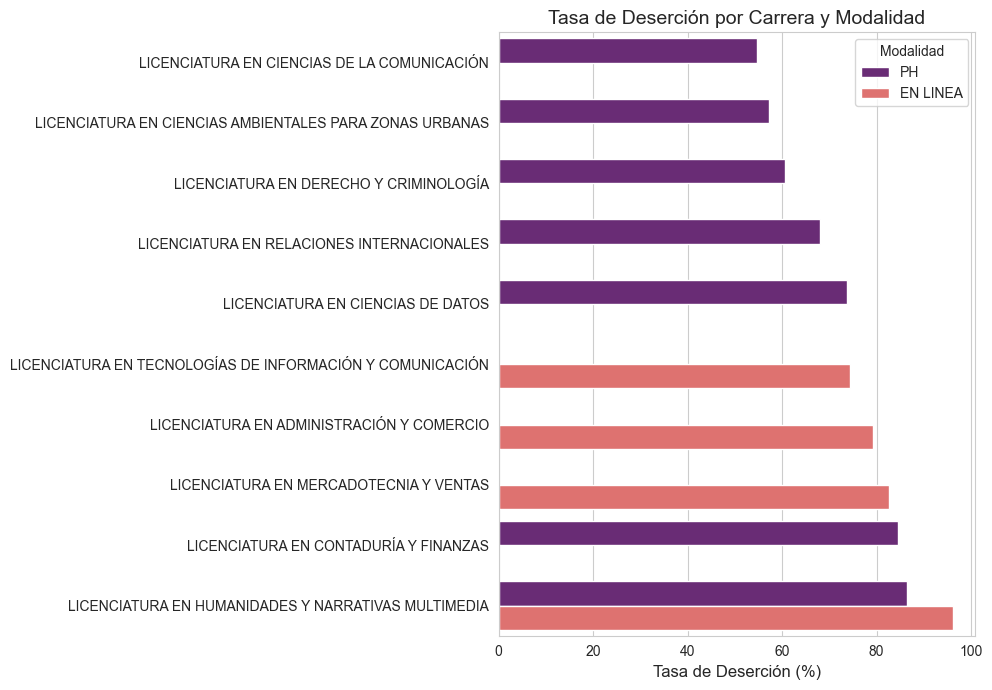

In [43]:
# Graficas

sns.set_style("whitegrid") # Estilo de fondo
sns.set_palette("rocket") # Paleta de colores
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12}) # Tamaño de fuente


plt.figure(figsize=(10, 7)) # Tamaño de la figura
sns.barplot( # Gráfico de barras
    data=df_validos.sort_values('Tasa de Deserción', ascending=True), # Datos ordenados
    y='Carrera', x='Tasa de Deserción', hue='Modalidad', # Dividir por modalidad
    palette='magma' # Paleta de colores
)
plt.title('Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título del gráfico
plt.xlabel('Tasa de Deserción (%)') # Etiqueta del eje x
plt.ylabel('') # Etiqueta del eje y vacía
plt.legend(title='Modalidad') # Leyenda
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

C:\Users\Almicar\AppData\Local\Temp\ipykernel_11832\477095698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos, y='Carrera', x='Tasa de Deserción', palette='coolwarm', ax=axes[i, 0]) # Gráfico de barras
C:\Users\Almicar\AppData\Local\Temp\ipykernel_11832\477095698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos, y='Carrera', x='Tasa de Deserción', palette='coolwarm', ax=axes[i, 0]) # Gráfico de barras


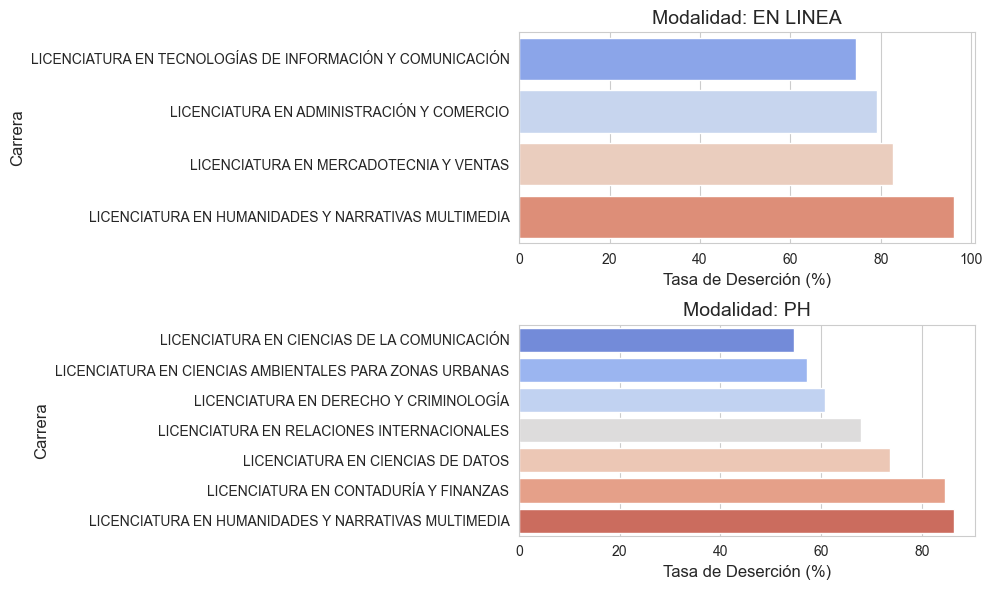

In [44]:
fig, axes = plt.subplots(nrows=df_validos['Modalidad'].nunique(), figsize=(10, 6), squeeze=False) # Subgráficos por modalidad
 # Ajustar tamaño de figura # 
# Graficar cada modalidad
for i, (modalidad, datos) in enumerate(df_validos.groupby('Modalidad')): # Agrupar por modalidad
    sns.barplot(data=datos, y='Carrera', x='Tasa de Deserción', palette='coolwarm', ax=axes[i, 0]) # Gráfico de barras
    axes[i, 0].set_title(f'Modalidad: {modalidad}') # Título del subgráfico
    axes[i, 0].set_xlabel('Tasa de Deserción (%)') # Etiqueta del eje x
    axes[i, 0].set_ylabel('Carrera') # Etiqueta del eje y

plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

C:\Users\Almicar\AppData\Local\Temp\ipykernel_11832\1653662620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='coolwarm') # Gráfico de caja


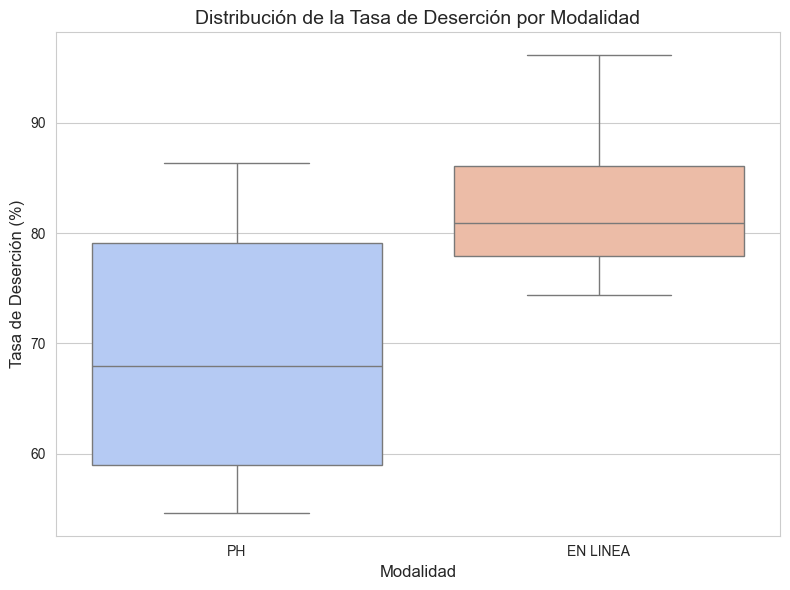

In [45]:
plt.figure(figsize=(8, 6)) # Tamaño de la figura
sns.boxplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='coolwarm') # Gráfico de caja
plt.title('Distribución de la Tasa de Deserción por Modalidad', fontsize=14) # Título del gráfico
plt.ylabel('Tasa de Deserción (%)') # Etiqueta del eje y
plt.xlabel('Modalidad') # Etiqueta del eje x
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

C:\Users\Almicar\AppData\Local\Temp\ipykernel_11832\1464683957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='Spectral') # Gráfico de violín


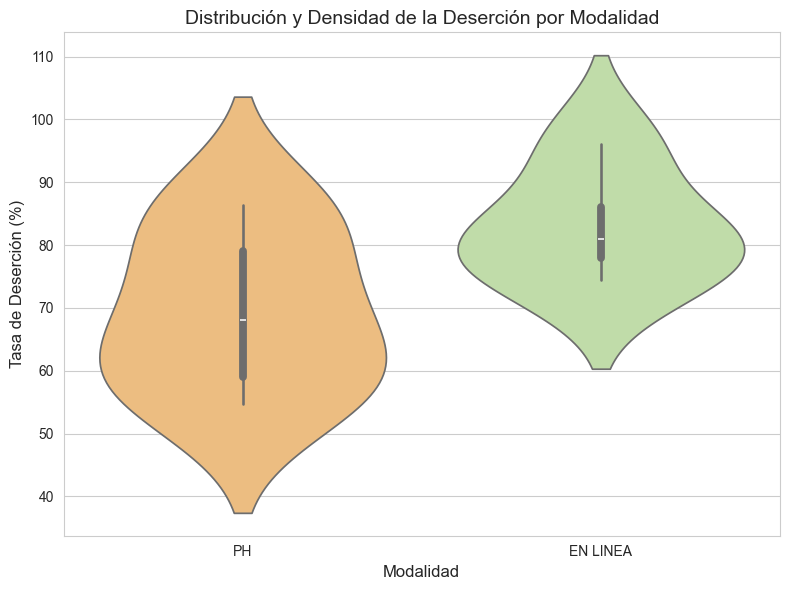

In [46]:
plt.figure(figsize=(8, 6)) # Tamaño de la figura
sns.violinplot(data=df_validos, x='Modalidad', y='Tasa de Deserción', palette='Spectral') # Gráfico de violín
plt.title('Distribución y Densidad de la Deserción por Modalidad', fontsize=14) # Título del gráfico
plt.ylabel('Tasa de Deserción (%)') # Etiqueta del eje y
plt.xlabel('Modalidad') # Etiqueta del eje x
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

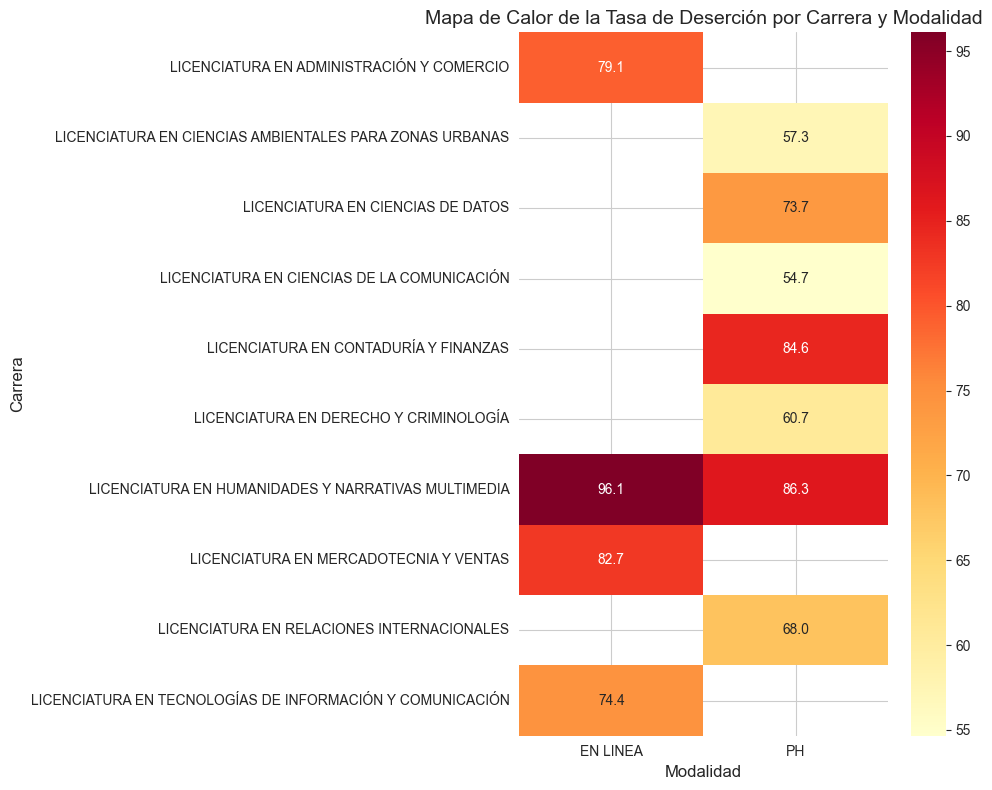

In [47]:
pivot = df_validos.pivot_table( 
    index='Carrera', columns='Modalidad', values='Tasa de Deserción' # Crear tabla pivote
)

plt.figure(figsize=(10, 8)) # Tamaño de la figura
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f") # Mapa de calor
plt.title('Mapa de Calor de la Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título del gráfico
plt.xlabel('Modalidad') # Etiqueta del eje x
plt.ylabel('Carrera') # Etiqueta del eje y
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico

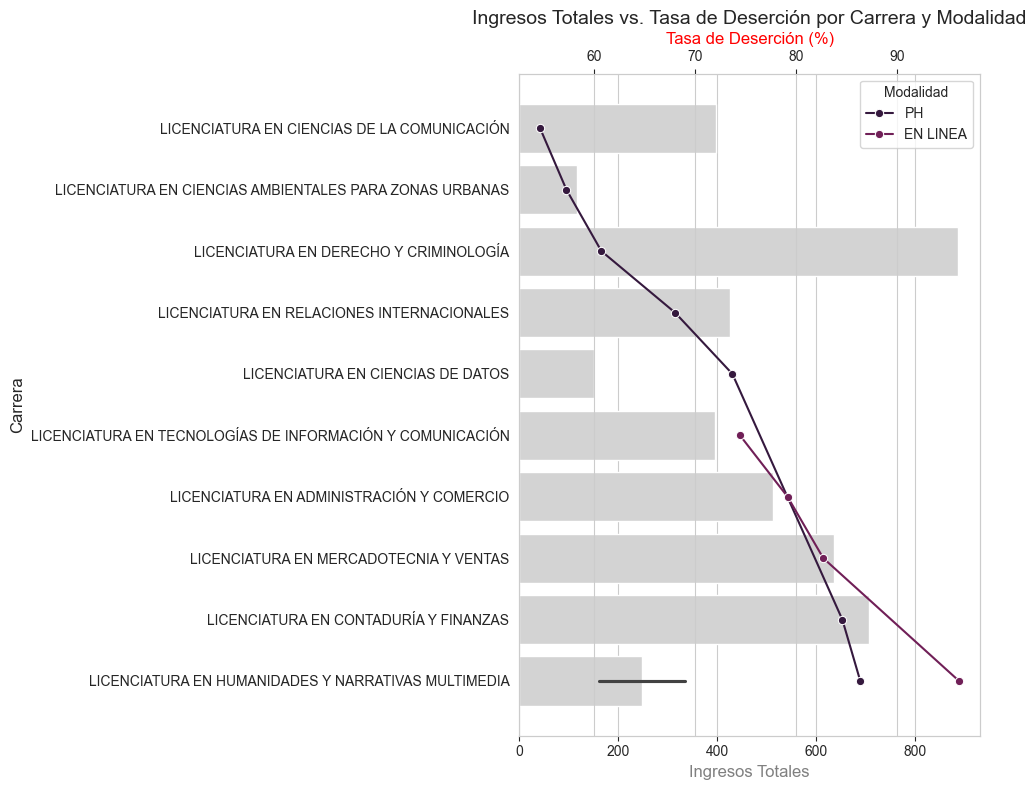

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 8)) # Gráfico combinado
# Eje x primario y secundario
sns.barplot(data=df_validos, y='Carrera', x='Nuevo Ingreso Total', color='lightgray', ax=ax1) # Eje x primario
ax2 = ax1.twiny() # Eje x secundario
sns.lineplot(data=df_validos, y='Carrera', x='Tasa de Deserción', hue='Modalidad', marker='o', ax=ax2) # Eje x secundario
ax1.set_ylabel('Carrera')  # Etiqueta eje y
ax1.set_xlabel('Ingresos Totales', color='gray') # Etiqueta eje x primario
ax2.set_xlabel('Tasa de Deserción (%)', color='red') # Etiqueta eje x secundario
plt.title('Ingresos Totales vs. Tasa de Deserción por Carrera y Modalidad', fontsize=14) # Título
plt.tight_layout() # Ajuste de diseño
plt.show() # Mostrar gráfico